# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('wine.csv')

In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df = df.drop(['residual sugar', 'free sulfur dioxide'],axis=1)
df.head(5)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.sample(6)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
349,9.1,0.785,0.00,0.093,28.0,0.99940,3.36,0.86,9.4,6
361,8.6,0.450,0.31,0.086,50.0,0.99820,3.37,0.91,9.9,6
330,10.2,0.360,0.64,0.122,41.0,0.99800,3.23,0.66,12.5,6
1145,8.2,0.200,0.43,0.076,51.0,0.99672,3.53,0.81,10.4,6
105,8.1,0.575,0.22,0.077,65.0,0.99670,3.29,0.51,9.2,5
696,7.0,0.650,0.02,0.066,25.0,0.99720,3.47,0.67,9.5,6


In [7]:
df.shape

(1599, 10)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.047065,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.012000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.070000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.079000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,0.090000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,0.611000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   total sulfur dioxide  1599 non-null   float64
 5   density               1599 non-null   float64
 6   pH                    1599 non-null   float64
 7   sulphates             1599 non-null   float64
 8   alcohol               1599 non-null   float64
 9   quality               1599 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 125.1 KB


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.093705,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.061298,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.203823,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
chlorides,0.093705,0.061298,0.203823,1.000000,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
total sulfur dioxide,-0.113181,0.076470,0.035533,0.047400,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.200632,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.265026,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.371260,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,-0.221141,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
quality,0.124052,-0.390558,0.226373,-0.128907,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000


# Data Visualization

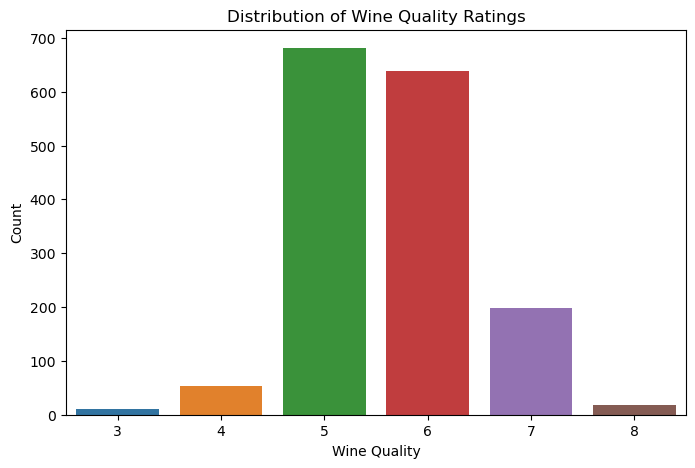

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()
df['quality'].value_counts()

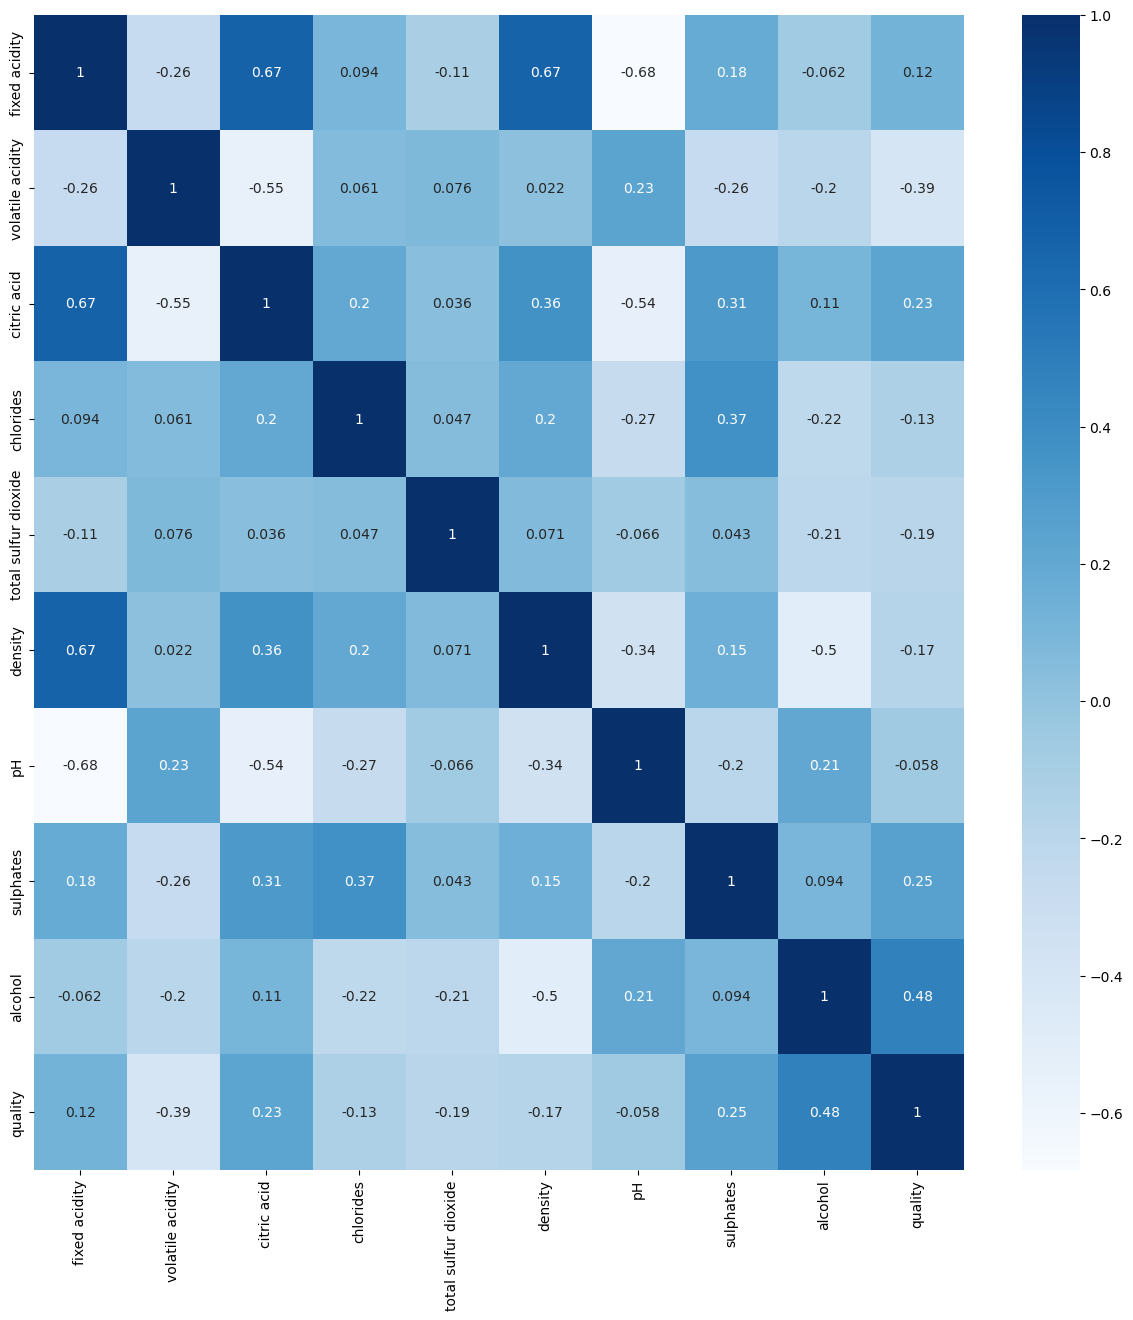

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

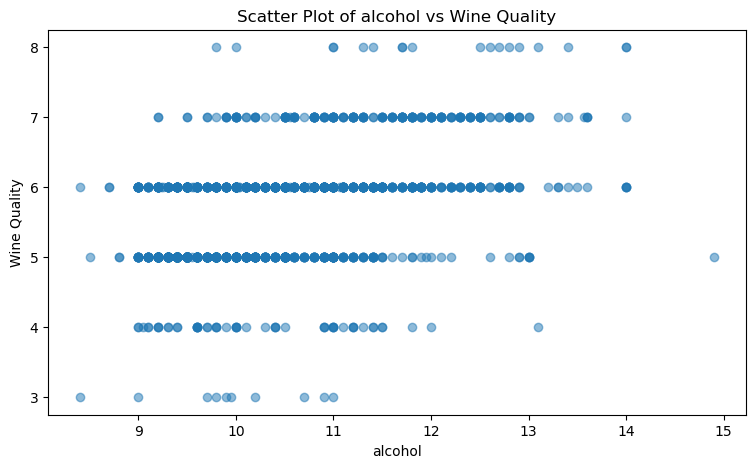

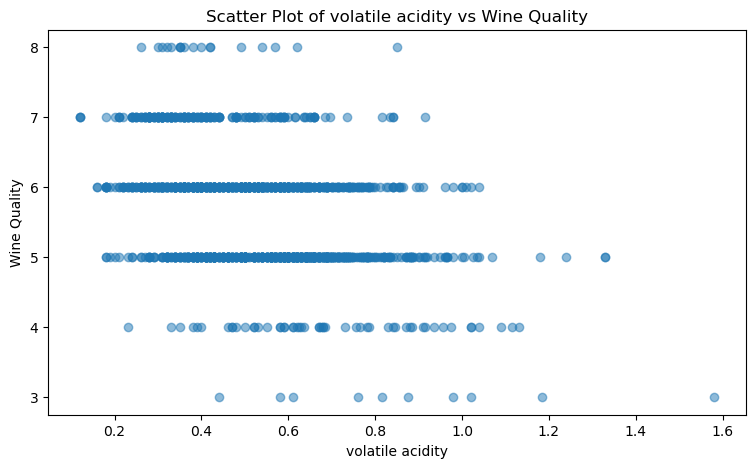

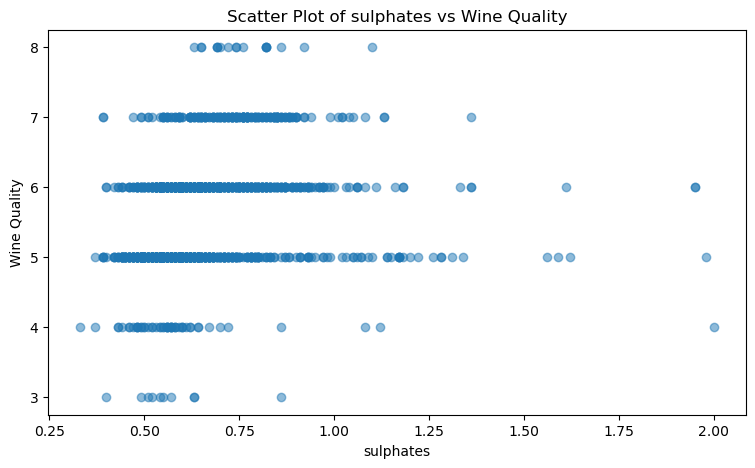

In [14]:
# Calculate correlations with 'quality'
correlations = df.corr()['quality'].abs().sort_values(ascending=False)

# Select top features (excluding 'quality' itself)
top_features = correlations.index[1:4]  # Change '4' to the number of top features you want to visualize

# Plot scatter plots for top features
for feature in top_features:
    plt.figure(figsize=(9, 5))
    plt.scatter(df[feature], df['quality'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Wine Quality')
    plt.xlabel(feature)
    plt.ylabel('Wine Quality')
    plt.show()


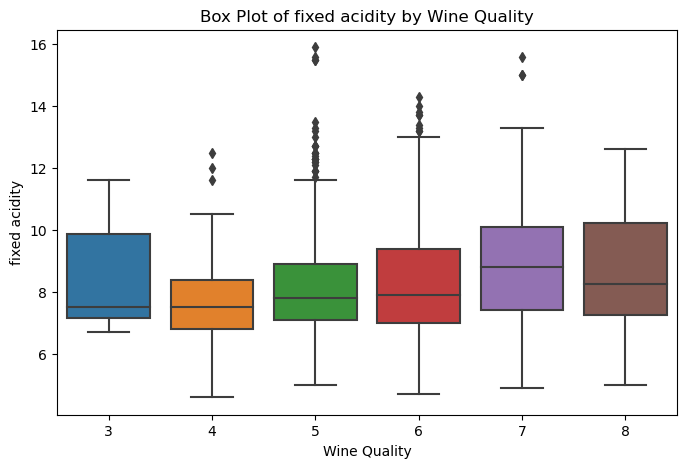

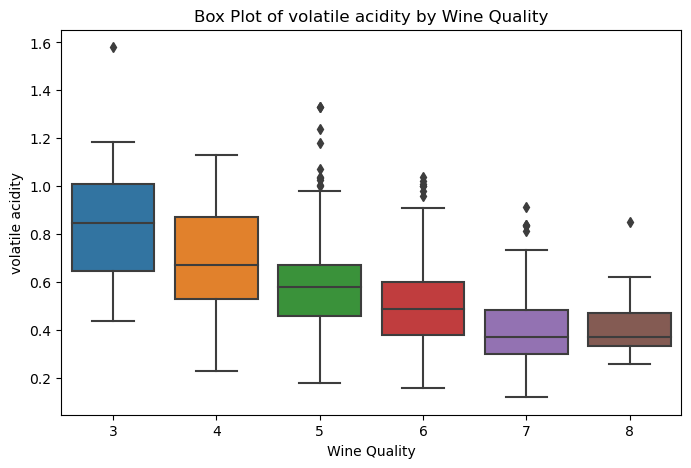

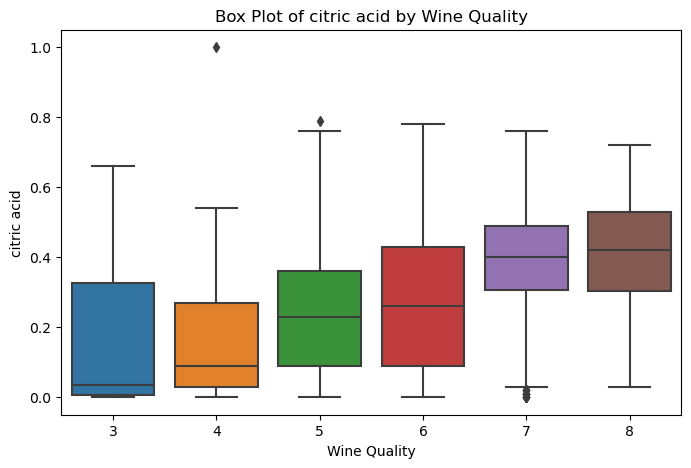

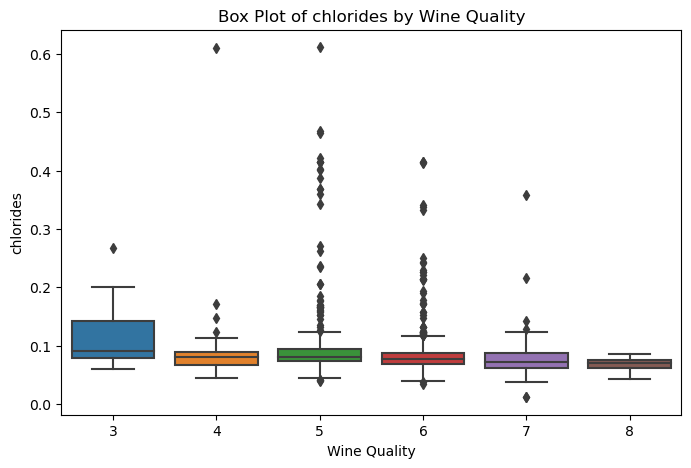

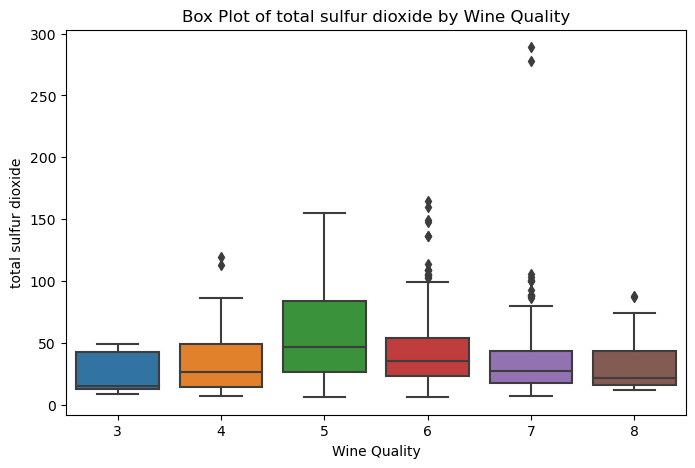

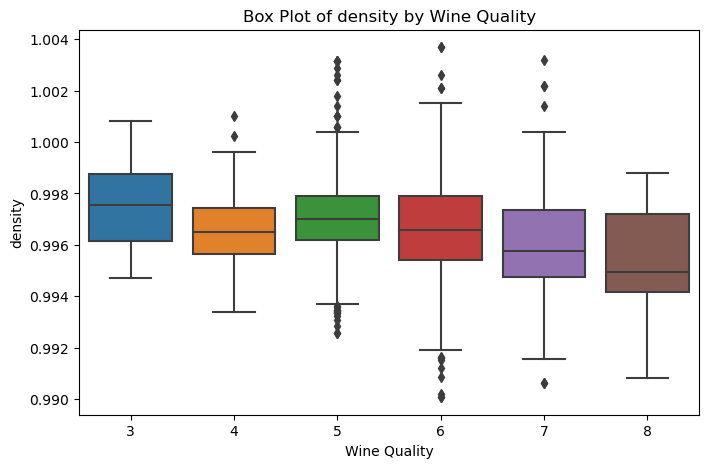

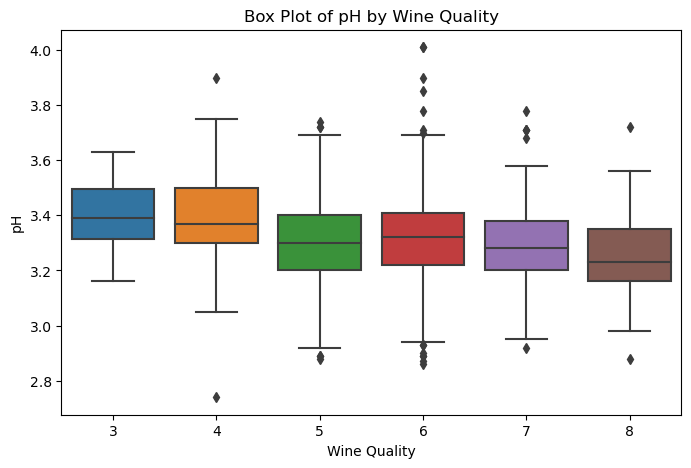

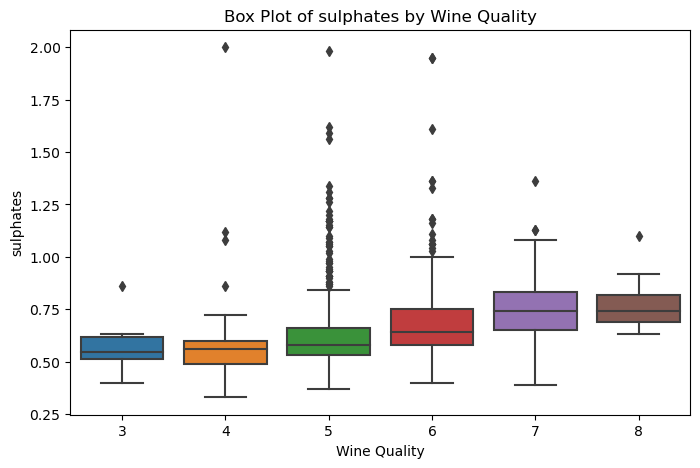

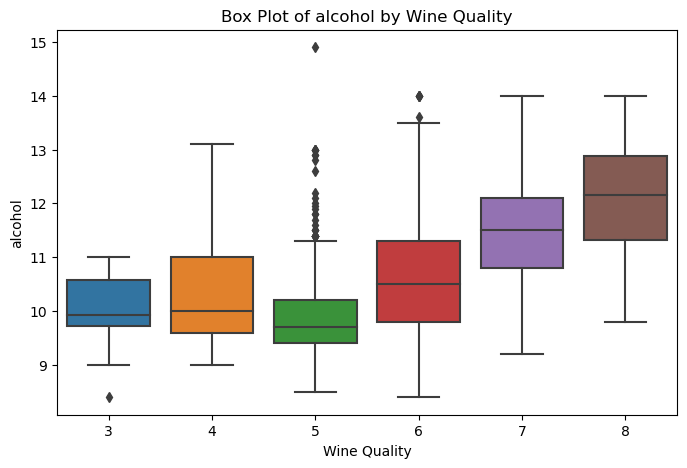

In [15]:
# Define the features you want to create box plots for
features = df.columns[:-1]  # Exclude the 'quality' column

# Create box plots for each feature, grouped by 'quality'
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='quality', y=feature)
    plt.xlabel('Wine Quality')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Wine Quality')
    plt.show()

# Feature Engineering

In [16]:
df['rating'] = pd.cut(df['quality'], bins=[0, 3, 7, 10], labels=['1', '2', '3'], include_lowest=True)
df = df.drop("quality", axis=1)

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,rating
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   chlorides             1599 non-null   float64 
 4   total sulfur dioxide  1599 non-null   float64 
 5   density               1599 non-null   float64 
 6   pH                    1599 non-null   float64 
 7   sulphates             1599 non-null   float64 
 8   alcohol               1599 non-null   float64 
 9   rating                1599 non-null   category
dtypes: category(1), float64(9)
memory usage: 114.2 KB


In [19]:
df['rating'] = df['rating'].astype(int)

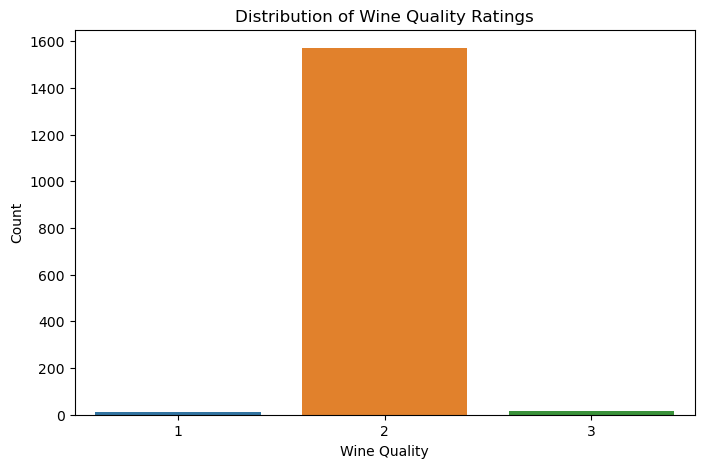

2    1571
3      18
1      10
Name: rating, dtype: int64

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()
df['rating'].value_counts()

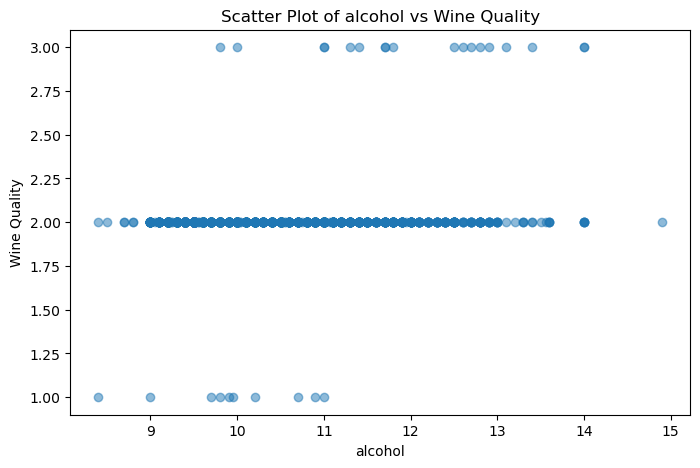

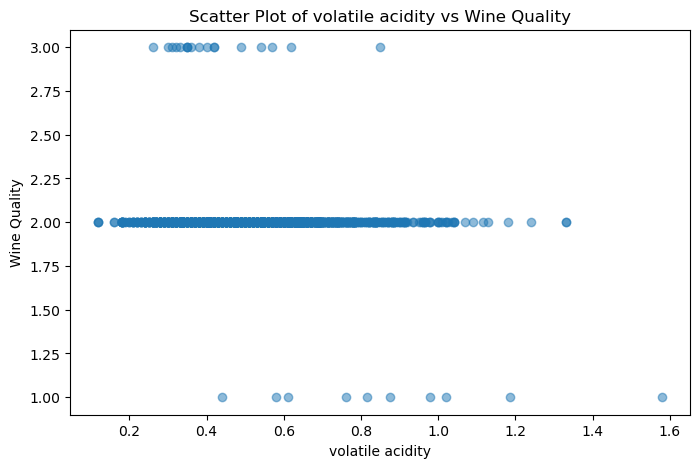

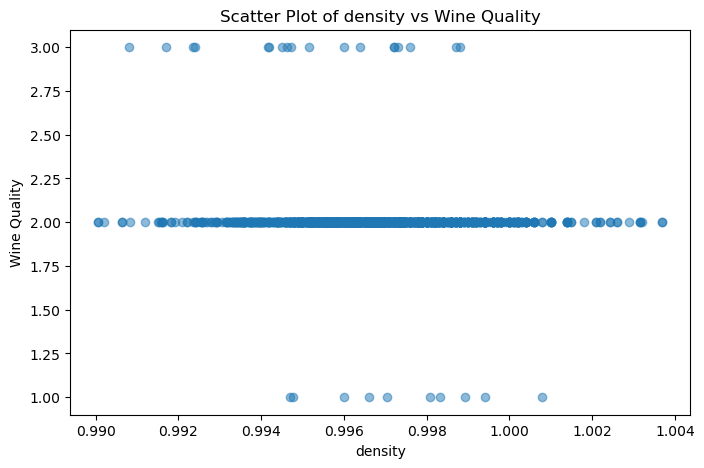

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the features with strong correlations with 'rating'
strong_correlations = correlation_matrix['rating'].abs().sort_values(ascending=False).index[1:]  # Exclude 'rating' itself

# Create scatter plots for the top N features with strong correlations
top_features = strong_correlations[:3]  # Adjust the number as needed

for feature in top_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['rating'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Wine Quality')
    plt.title(f'Scatter Plot of {feature} vs Wine Quality')
    plt.show()

In [22]:
data = df.values
X = data[:,0:9]
Y = data[:,9]

In [23]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Linear Regression Algo

In [25]:
lr = LinearRegression()
lr_scaled = LinearRegression()

In [26]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)


In [29]:
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.27910022016734937


In [31]:
# Convert predicted values to integers for classification
y_pred_class = np.round(y_pred).astype(int)

# Now you can use classification metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8759278897136797
Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.94      0.89       301
         2.0       0.93      0.69      0.80       327
         3.0       0.87      1.00      0.93       315
         4.0       0.00      0.00      0.00         0

    accuracy                           0.88       943
   macro avg       0.66      0.66      0.65       943
weighted avg       0.88      0.88      0.87       943



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.27910022016734937
Mean Squared Error (MSE): 0.12903359793815417
R-squared (R2): 0.8024029986069972


In [33]:
# Assuming y_test and y_pred are your actual and predicted values

# Define a function to calculate accuracy within a tolerance range
def calculate_accuracy(y_true, y_pred, tolerance=0.5):
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions)
    return accuracy

# Calculate and print accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print(f"Accuracy within a tolerance of 0.5: {accuracy}")


Accuracy within a tolerance of 0.5: 0.8759278897136797
